<h1>Step 2: Generate our 2D embedding</h1>
https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

In [1]:
import pandas as pd
import spacy 
nlp = spacy.load("de_core_news_sm")
import matplotlib.pyplot as plt
import gzip,os,glob
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn.manifold import TSNE

In [2]:
doc_vec = np.load('../data/after_nltk/doc_vec-200.npy')

In [3]:
# Creates TSNE model and plots it
x = []
y = []


def tsne_plot(message_embeddings):
    labels = []
    tokens = []  
    
    tsne_model = TSNE(perplexity=50, n_components=2, init='pca',
                      n_iter=5000, 
                      random_state=23)

    new_values = tsne_model.fit_transform(message_embeddings)

    global x,y
    
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i],s=0.2)
    plt.show()


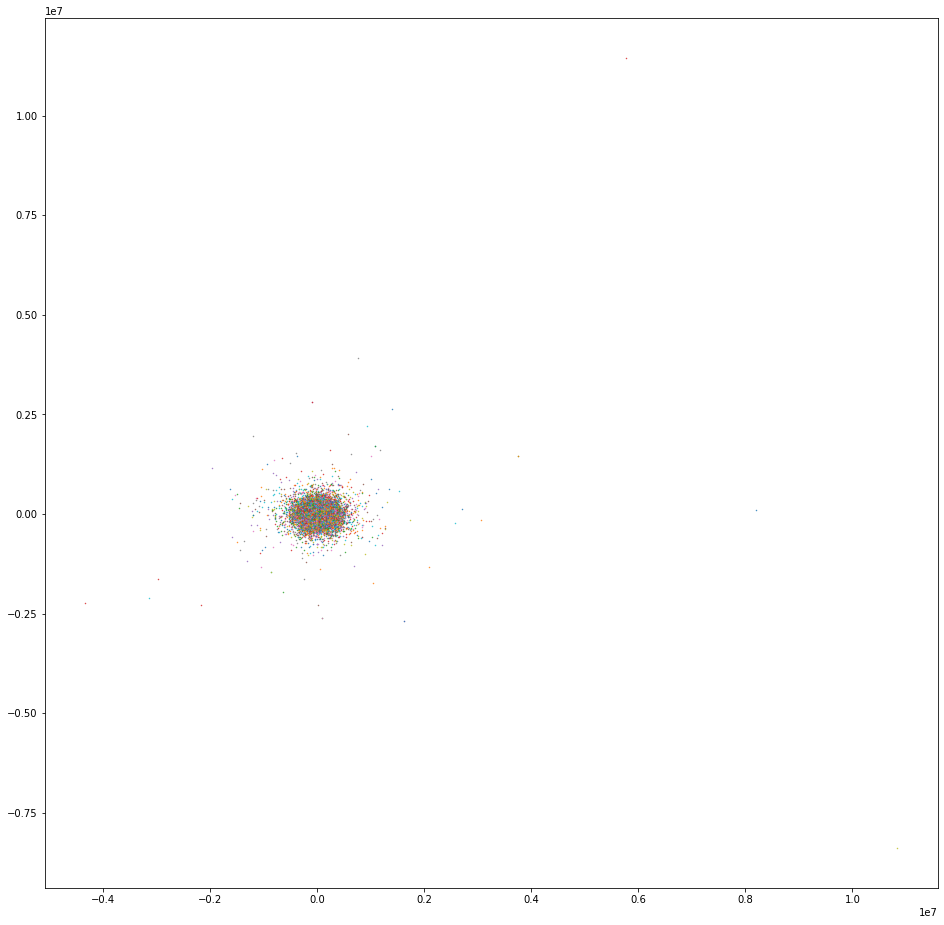

In [4]:
tsne_plot(doc_vec)

In [5]:
df_values = pd.DataFrame.from_dict({'x':x,'y':y})

In [6]:
print(df_values)

                   x              y
0       63436.132812  -47015.738281
1     -111506.937500  -17000.431641
2      -77741.734375  159121.421875
3      162413.843750  -76594.007812
4      -95646.609375 -106136.210938
...              ...            ...
18138  -28029.326172   77832.664062
18139  116313.507812  376606.031250
18140    8343.022461   25277.220703
18141   76508.757812   97287.515625
18142  -98658.601562  258214.406250

[18143 rows x 2 columns]


In [7]:
df_temp = pd.read_pickle('../data/after_nltk/data_after_nltk.pkl')
df_all = pd.concat([df_temp,df_values], axis=1)
df_all.drop(inplace=True, columns=['Languagereview','word_count'])

In [8]:
# df = pd.read_pickle('../data/after_nltk/data_after_nltk.pkl')
# df_all = pd.concat([df, df_values], axis=1, sort=False)
# df_all = df_all.drop(['Languagereview', 'content_nltk'], axis=1)
df_all.to_excel('../data/after_nltk/data_for_tableau_testing.xlsx', index = False)